### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from numpy import count_nonzero

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


<b> Cleaning and Formatting the Data <b>
   
    Let's find which all columns contains missing values and how many of those.

2. Investigate the dataset for missing or problematic data.

In [4]:
for col in  data.columns:
    total_missing = data[col].isna().sum()
    print('[' + col +  ' ] - ' + str(total_missing))

[destination ] - 0
[passanger ] - 0
[weather ] - 0
[temperature ] - 0
[time ] - 0
[coupon ] - 0
[expiration ] - 0
[gender ] - 0
[age ] - 0
[maritalStatus ] - 0
[has_children ] - 0
[education ] - 0
[occupation ] - 0
[income ] - 0
[car ] - 12576
[Bar ] - 107
[CoffeeHouse ] - 217
[CarryAway ] - 151
[RestaurantLessThan20 ] - 130
[Restaurant20To50 ] - 189
[toCoupon_GEQ5min ] - 0
[toCoupon_GEQ15min ] - 0
[toCoupon_GEQ25min ] - 0
[direction_same ] - 0
[direction_opp ] - 0
[Y ] - 0


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
'''There are total 12684 records in the data and if you notive above from missing data 
statitics,column "car" missing 99% of the data. 
So I dont think we should be considering this column for analysis.'''

data = data.drop(['car'], axis=1)

'''Also we will drop records with missing data.'''

data = data.dropna()
data.count()

destination             12079
passanger               12079
weather                 12079
temperature             12079
time                    12079
coupon                  12079
expiration              12079
gender                  12079
age                     12079
maritalStatus           12079
has_children            12079
education               12079
occupation              12079
income                  12079
Bar                     12079
CoffeeHouse             12079
CarryAway               12079
RestaurantLessThan20    12079
Restaurant20To50        12079
toCoupon_GEQ5min        12079
toCoupon_GEQ15min       12079
toCoupon_GEQ25min       12079
direction_same          12079
direction_opp           12079
Y                       12079
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
'''Let's find out the many drivers have accepted the coupons'''
accept_total_cnt = data.query('Y==1').count()
'''Now find the total coupon acceptance ratio  from the data'''
ratio = (accept_total_cnt/ data.count())*100
accept_total_per = ratio['Y']
type(accept_total_per)
'''So 56.93 % percentance of the drivers have accepted the coupons.''' 
accept_total_per

56.93352098683666

5. Use a bar plot to visualize the `coupon` column.

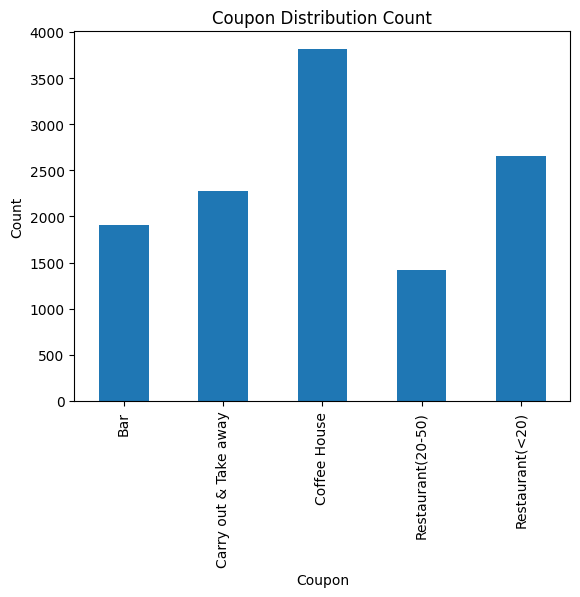

In [90]:
''' Plotted Bar ditribution plot for coupon values and found that Coffee House coupon have most offered to drivers ,
followed by Restaurant<20 coupon '''

data.groupby('coupon').size().reset_index().plot(kind='bar',x='coupon',legend=False)
plt.ylabel('Count')
plt.xlabel('Coupon')
plt.title('Coupon Distribution Count')
plt.savefig('images/coupon_distribution_count.png')

6. Use a histogram to visualize the temperature column.

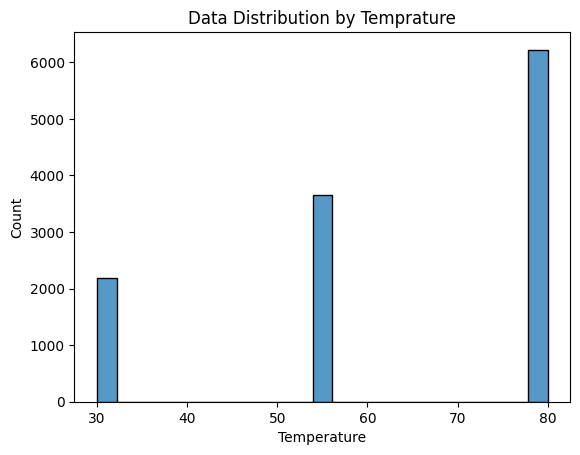

In [98]:
# data['temperature'].plot(kind='hist')

sns.histplot(data=data,x='temperature')
plt.xlabel('Temperature')
plt.title('Data Distribution by Temprature')
plt.savefig('images/Data_Distribution_by_Temprature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [102]:
bar_coupon_data = data.query('coupon=="Bar"')
bar_coupon_data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. What proportion of bar coupons were accepted?


In [113]:
''' Now to find ratio of accepted Bar Coupon , we will find the accepted Bar coupon records counts and total Bar Coupon counts'''
total_bar_coupon_count = len(data.query('coupon=="Bar"'))
accepted_bar_coupon_count = len(data.query('coupon=="Bar" and Y==1'))
accepted_bar_coupon_ratio = (accepted_bar_coupon_count / total_bar_coupon_count)* 100
accepted_bar_coupon_ratio

41.19184526921067

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [129]:
'''Filter the  data with only accepted coupon for Bar coupon'''
accepted_bar_coupon_data= data.query('coupon=="Bar" and Y==1')
'''Find out the length of the data with accepted coupon for Bar coupon'''
accepted_bar_coupon_count = len(accepted_bar_coupon_data.query('coupon=="Bar" and Y==1'))
'''Find out the accetped coupon counts based upon different Bar values'''
accepted_bar_coupon_group_count = accepted_bar_coupon_data.groupby('Bar').count()['coupon'].reset_index()
'''Create a new coliumn which represent the ratio of acceptance by Bar by dividing the total counts by Bar by total accepted Bar Coupon counts'''
accepted_bar_coupon_group_count['accepted_bar_coupon_ratio'] = accepted_bar_coupon_group_count['coupon']/accepted_bar_coupon_count

''' Draw a Pie chart which presents the ratio comparision between population whoc visit bar and cupon acceptance ratio'''
fig = px.pie(data_frame=accepted_bar_coupon_group_count,values='accepted_bar_coupon_ratio',names='Bar')
fig.show()

'''According to Pie chart data, frequent bar visiter are less coupon accpters vs occasional or rare bar visitor'''

'''Continue to Next cell....'''


In [132]:
''' Now let's Divide Visitor group into only two following group  and compare the coupon acceptance rate

    1) less than 3 times per month visitor
    2) more than 3 times visitor per month

'''

accepted_bar_coupon_group_count['accepted_bar_coupon_ratio'] = accepted_bar_coupon_group_count['coupon']/accepted_bar_coupon_count



,Bar,coupon,accepted_bar_coupon_ratio
0,1~3,245,0.310914
1,4~8,114,0.144670
2,gt8,33,0.041878
3,less1,247,0.313452
4,never,149,0.189086


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  